In this file we will perform CNN on the Santander File.

Feature Selection , inversing and transposing the file to achieve a better accuracy

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
# import the data
train = pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv')
test = pd.read_csv('/kaggle/input/santander-customer-satisfaction/test.csv')

# check the shape
train.shape, test.shape

((76020, 371), (75818, 370))

In [3]:
train.head()
# test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


Our training data contains 'Target' Column extra ,which is our dependent variable and testing data contains only the independent variables.

Also the Column ID is of no relevance so will drop it.

In [4]:
# Dividing the dataframe into dependent and independent variable
X=train.drop(['ID','TARGET'], axis=1)
y=train['TARGET']
test=test.drop(['ID'], axis=1)

# check the shape again
X.shape, y.shape, test.shape

((76020, 369), (76020,), (75818, 369))

In [5]:
# Now we will seperate the data into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

We will perform Feature Selection Methods hers.

Removing Constant, Quasi Constant and Duplicate Features

In [6]:
# Constant and Quasi Constant
filter=VarianceThreshold(0.01)
# this will be used to remove the data which has low variance of 1% or below

In [7]:
X_train=filter.fit_transform(X_train)
X_test=filter.transform(X_test)
test=filter.transform(test)
# now check the shape again
X_train.shape, X_test.shape, test.shape

((60816, 268), (15204, 268), (75818, 268))

We can see that earlier we had 369 features, now our features are 268.

Now we will remove the duplicate features as well. We will remove the duplicates by transposing the data , converting the columns into rows and rows into columns

In [8]:
X_train_T=X_train.T
X_test_T=X_test.T
test_T=test.T

In [9]:
# converting the transposed value into a dataframe
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)
test_T=pd.DataFrame(test_T)

In [10]:
X_train_T
X_test_T
test_T

,0,1,2,3,4,5,6,7,8,9,...,75808,75809,75810,75811,75812,75813,75814,75815,75816,75817
0,2.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.0,2.0,2.00,2.000000,2.000000
1,32.0,35.00,23.00,24.00,23.00,43.00,39.00,29.00,53.00,37.00,...,38.00,34.00,48.00,27.00,42.00,23.0,26.0,24.00,40.000000,23.000000
2,0.0,0.00,0.00,0.00,0.00,0.00,495.00,0.00,0.00,0.00,...,308.70,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000
3,0.0,0.00,0.00,0.00,0.00,0.00,2334.42,0.00,0.00,0.00,...,1586.94,0.00,1500.00,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000
4,0.0,0.00,0.00,0.00,0.00,0.00,4815.42,0.00,0.00,0.00,...,1972.92,0.00,1603.65,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000
264,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000
265,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000
266,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000


Now we will check how many features are duplicate

In [11]:
X_train_T.duplicated().sum()

16

In [12]:
test_T.duplicated().sum()

20

Store the duplicates into a variable

In [13]:
duplicated=X_train_T.duplicated()
duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
263    False
264    False
265    False
266    False
267    False
Length: 268, dtype: bool

Here all the values which are True are the duplicate ones,
We will perform inversion on the values by changing True to False, and False to True.

In [14]:
# perform inversion
features_to_keep=[not index for index in duplicated]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

Now we will remove the duplicates and keep only the unique features and also we will transpose the dataframe again into its original shape

In [15]:
X_train=X_train_T[features_to_keep].T
print(X_train.shape)

X_test=X_test_T[features_to_keep].T
print(X_test.shape)

test=test_T[features_to_keep].T
print(test.shape)

(60816, 252)
(15204, 252)
(75818, 252)


This preprocessing will help into getting a better accuracy for the model.

In [16]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41946.930000
1,2.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40669.110000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483437.670000
3,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150469.950000
4,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67277.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98264.490000
60812,2.0,34.0,0.0,208.8,268.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112771.860000
60813,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66889.260000
60814,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,461579.820000


There is variance in the dataset so we will scale the data

In [17]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
test=scaler.transform(test)

X_train

array([[ 3.91163036e-02, -7.87596427e-01, -5.30726733e-02, ...,
        -1.93653167e-02, -2.16005714e-02, -3.87393967e-01],
       [ 3.91163036e-02,  2.99635886e+00, -5.30726733e-02, ...,
        -1.93653167e-02, -2.16005714e-02, -3.93933200e-01],
       [ 3.91163036e-02, -7.87596427e-01, -5.30726733e-02, ...,
        -1.93653167e-02, -2.16005714e-02,  1.87193125e+00],
       ...,
       [ 3.91163036e-02, -7.10372850e-01, -5.30726733e-02, ...,
        -1.93653167e-02, -2.16005714e-02, -2.59751799e-01],
       [ 3.91163036e-02,  2.93533654e-01, -5.30726733e-02, ...,
        -1.93653167e-02, -2.16005714e-02,  1.76007388e+00],
       [ 3.91163036e-02, -7.87596427e-01, -5.30726733e-02, ...,
        -1.93653167e-02, -2.16005714e-02, -1.71906800e-03]])

In [18]:
# check the shape again
X_train.shape,X_test.shape,test.shape,y_train,y_test,

((60816, 252),
 (15204, 252),
 (75818, 252),
 26251    0
 18063    0
 43237    0
 31385    0
 5619     0
         ..
 57042    0
 36008    0
 46265    0
 23587    0
 29313    0
 Name: TARGET, Length: 60816, dtype: int64,
 40288    0
 22254    0
 74153    0
 60990    0
 55580    0
         ..
 24094    0
 51950    0
 853      0
 15258    0
 12821    0
 Name: TARGET, Length: 15204, dtype: int64)

we will convert the shape acceptable to our neural network and y_test and y_train into numpy format

In [19]:
# reshaping
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
test=test.reshape(test.shape[0],test.shape[1],1)
# check the shape again
X_train.shape, X_test.shape, test.shape

((60816, 252, 1), (15204, 252, 1), (75818, 252, 1))

In [20]:
# series to numpy
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

Now our data is completely preprocessed , we will Build a model for it

In [21]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPool1D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
# model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(252,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
%%time
# fittting the model
history=model.fit(X_train,y_train, epochs=10,batch_size=128 ,validation_data=(X_test,y_test))

Epoch 1/10
476/476 [==============================] - 35s 74ms/step - loss: 0.2614 - accuracy: 0.9462 - val_loss: 0.1737 - val_accuracy: 0.9613
Epoch 2/10
476/476 [==============================] - 36s 76ms/step - loss: 0.2007 - accuracy: 0.9553 - val_loss: 0.1868 - val_accuracy: 0.9613
Epoch 3/10
476/476 [==============================] - 35s 74ms/step - loss: 0.1814 - accuracy: 0.9585 - val_loss: 0.1995 - val_accuracy: 0.9612
Epoch 4/10
476/476 [==============================] - 35s 74ms/step - loss: 0.1764 - accuracy: 0.9594 - val_loss: 0.1955 - val_accuracy: 0.9613
Epoch 5/10
476/476 [==============================] - 35s 73ms/step - loss: 0.1737 - accuracy: 0.9594 - val_loss: 0.1929 - val_accuracy: 0.9613
Epoch 6/10
476/476 [==============================] - 34s 72ms/step - loss: 0.1709 - accuracy: 0.9597 - val_loss: 0.1832 - val_accuracy: 0.9613
Epoch 7/10
476/476 [==============================] - 35s 74ms/step - loss: 0.1678 - accuracy: 0.9597 - val_loss: 0.1791 - val_accuracy:

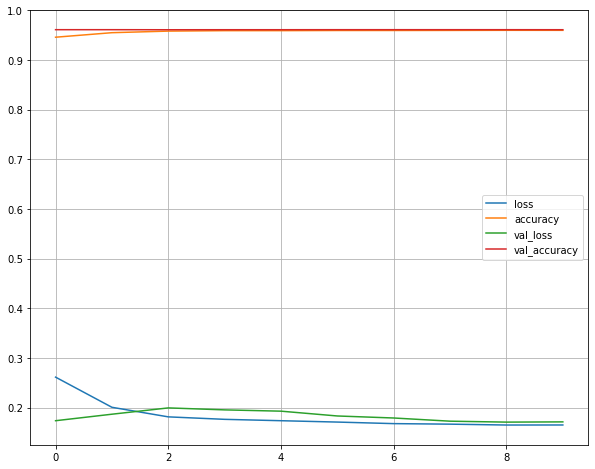

In [25]:
# plotting the data
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.show()

In [27]:
# prediction
y_pred=model.predict_classes(test)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [28]:
# plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [32]:
plot_confusion_matrix?

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f60676e9110>)

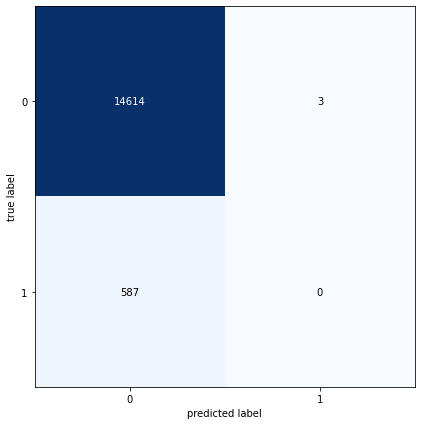

In [35]:
mat=confusion_matrix(y_test, y_pred[:15204,])
plot_confusion_matrix(conf_mat=mat, figsize=(7,7))

In [37]:
y_pred.ndim

2

As the data in y_pred is 2 dimensional, we will convert the same into 1 dim

In [38]:
y_pred=np.ravel(y_pred)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [40]:
results = pd.Series(y_pred,name="TARGET")
results

0        0
1        0
2        0
3        0
4        0
        ..
75813    0
75814    0
75815    0
75816    0
75817    0
Name: TARGET, Length: 75818, dtype: int32

In [41]:
submission = pd.concat([pd.Series(range(1,75819),name = "ID"),results],axis = 1)
submission

,ID,TARGET
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
75813,75814,0
75814,75815,0
75815,75816,0
75816,75817,0


In [43]:
submission.to_csv("submission.csv",index=False)